# Short Term Rental Revenue Predictor

## Overview

In the realm of short-term vacation rental businesses, the ability to predict revenue accurately plays a pivotal role in decision-making processes. As the market for short-term rentals continues to expand rapidly, property owners and managers face the challenge of maximizing profitability while meeting the diverse needs of guests.

This capstone project endeavors to address this challenge by developing a predictive model that can forecast revenue based on a variety of factors including the number of bedrooms, accommodation capacity, location, and available amenities. The significance of such a model lies in its potential to provide valuable insights into the profitability of potential rental properties, enabling stakeholders to make informed decisions about property investments and management strategies.

## Business Understanding

[Cloud 9 Cabins](https://www.cloud9cabins.com/), a prominent player in the vacation rental industry, is poised for expansion and seeks to diversify its property portfolio. However, the company faces a critical challenge: determining the profitability of potential new properties before committing significant resources to their development. This challenge underscores the importance of accurately predicting revenue for each property based on its unique characteristics. By doing so, Cloud 9 Cabins can make informed decisions about which properties to invest in, mitigating the risk of investing in unprofitable ventures and maximizing returns on investment.

The real-world problem at hand is twofold: first, the uncertainty surrounding the revenue potential of new vacation rental properties; and second, the need for Cloud 9 Cabins to optimize its investment strategy to ensure sustainable growth and profitability. The stakeholders directly impacted by this problem include not only Cloud 9 Cabins itself, but also property owners, investors, and local communities seeking economic opportunities. For Cloud 9 Cabins, the ability to accurately predict revenue serves as a cornerstone for strategic decision-making, enabling them to allocate resources efficiently and pursue growth opportunities with confidence.

## Data Understanding

The dataset used in this project was sourced from [AirDNA](https://www.airdna.co/?utm_term=airdna&utm_campaign=brand&utm_source=google&utm_medium=cpc&hsa_acc=6167315757&hsa_cam=17800124565&hsa_grp=142138831187&hsa_ad=611451046477&hsa_src=g&hsa_tgt=kwd-316106200999&hsa_kw=airdna&hsa_mt=e&hsa_net=adwords&hsa_ver=3&gad_source=1&gclid=CjwKCAjw_e2wBhAEEiwAyFFFo69feFRzrMUqCeCQucViuSTUbInd0CrYUD8ZJitUSwl5vGJBddEbCBoCWjkQAvD_BwE). AirDNA is a data analytics company specializing in short-term vacation rental market intelligence. They offer a range of services and products designed to provide valuable insights into the vacation rental industry, helping property owners, managers, investors, and other stakeholders make informed decisions. Here are some key aspects of what AirDNA offers:

1. **Market Data and Analytics:** AirDNA collects and analyzes data from various sources, including vacation rental platforms like Airbnb and Vrbo, to provide comprehensive market insights. This data includes information on rental rates, occupancy rates, demand trends, and other key metrics at both the macro and micro levels.

2. **Competitive Analysis:** AirDNA's platform allows users to conduct competitive analysis by comparing their properties to similar listings in their market. This helps users understand their position relative to competitors and identify opportunities for optimization.

3. **Revenue Management Tools:** AirDNA offers tools and features to help property owners and managers optimize their revenue generation strategies. This may include pricing recommendations based on market demand and competitor analysis, as well as insights into seasonal trends and events impacting rental demand.

4. **Investment Analysis:** AirDNA's data can be valuable for investors looking to assess the potential profitability of vacation rental properties. By providing insights into market dynamics and revenue potential, AirDNA helps investors make data-driven decisions about property acquisitions and portfolio management.

5. **Market Reports and Insights:** AirDNA publishes regular reports and insights on trends and developments in the vacation rental industry. These reports cover topics such as market growth, regulatory changes, and emerging trends, providing valuable information for industry professionals.

For this project, we leveraged AirDNA's comprehensive comp data, sourced from platforms such as Airbnb, Vrbo, third-party data providers, and existing users of AirDNA. This dataset includes information on existing vacation rental properties, encompassing details such as revenue, amenities, occupancy rates, and more. Accessing this invaluable comp data entails contacting AirDNA directly and procuring their product. Interested parties can gain access to this wealth of information by reaching out to AirDNA and engaging with one of their sales representatives. 

### EDA
In the following blocks of code, we will conduct an Exploratory Data Analysis (EDA) on the dataset. First, let us load in all the necessary packages and libraries that we will use in this analysis.

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive Widgets
from ipywidgets import interact, fixed
import ipywidgets as widgets

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Pipeline
from sklearn.pipeline import Pipeline
# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Model Algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.svm import SVR

# XGBoost
import xgboost
from xgboost import XGBRegressor

# Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")


#### Loading the Dataset

The dataset consists of 9039 entries and 33 columns. Here's a brief overview of the key information:

- **Columns**: 
    - There are various columns containing information about the properties, including details such as property ID, title, property manager/host ID, number of bedrooms and bathrooms, city name, amenities (e.g., air conditioning, gym, hot tub, kitchen, parking, pets allowed, pool), latitude and longitude coordinates, price tier, state name, superhost status, zipcode, minimum stay, available nights, revenue, revenue potential, average daily rate (ADR), occupancy, cleaning fee, property reviews, and property rating.

- **Data Types**:
    - The dataset contains a mix of data types, including object (e.g., property ID, title, city name), float64 (e.g., bedrooms, bathrooms, latitude, longitude), bool (e.g., amenities), int64 (e.g., zipcode), and object (e.g., price tier, superhost status).

- **Missing Values**:
    - Some columns have missing values, such as bedrooms, accommodates, instant book status, superhost status, Vrbo listing URL, minimum stay, ADR, cleaning fee, property reviews, and property rating.

- **Target Variable**:
    - The target variable is 'Revenue', which represents the revenue generated by each property.

In [2]:
# Load the dataset
file_path = 'data/DR_ML_TTM_data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,Property ID,TITLE,Property Manager/ Host ID,BEDROOMS,ACCOMMODATES,Airbnb Host URL,Airbnb Listing URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available Nights,Revenue,Revenue Potential,ADR,Occupancy,Cleaning Fee,Property Reviews,Property Rating
0,abnb_188059,"Vineyard Estate: 33 Acres, Private Vineyard + ...",905546,5.0,12.0,https://www.airbnb.com/users/show/905546,https://www.airbnb.com/rooms/188059,5.5,Glen Ellen,True,...,95442,3.0,320,555481,616369.58,2722.946078,0.666667,500.0,50.0,4.900000
1,abnb_282262,Hudson Valley Farm House 5Br 4.5Ba,836724,6.0,16.0,https://www.airbnb.com/users/show/836724,https://www.airbnb.com/rooms/282262,4.5,Hopewell Junction,True,...,12533,2.0,332,429070,446757.79,1292.379518,1.000000,148.0,109.0,4.950000
2,abnb_253507,Blue Sky Mountain Ranch - 120 acres!,1331143,6.0,12.0,https://www.airbnb.com/users/show/1331143,https://www.airbnb.com/rooms/253507,3.0,Black Hawk,False,...,80422,3.0,327,278428,315974.32,1210.556522,0.703364,490.0,124.0,5.000000
3,abnb_287265,Park City Old Town Fun and Convenience,1494302,4.0,16.0,https://www.airbnb.com/users/show/1494302,https://www.airbnb.com/rooms/287265,4.5,Park City,False,...,84060,5.0,336,241352,269278.50,877.643636,0.818452,350.0,191.0,4.884817
4,abnb_61121,Spacious Secluded Luxury Home five min. from V...,295495,4.0,7.0,https://www.airbnb.com/users/show/295495,https://www.airbnb.com/rooms/61121,3.5,Vail,False,...,81657,5.0,328,159549,188816.81,1100.337931,0.611814,300.0,27.0,5.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property ID                9039 non-null   object 
 1   TITLE                      9039 non-null   object 
 2   Property Manager/ Host ID  9039 non-null   object 
 3   BEDROOMS                   9029 non-null   float64
 4   ACCOMMODATES               9031 non-null   float64
 5   Airbnb Host URL            6397 non-null   object 
 6   Airbnb Listing URL         6397 non-null   object 
 7   BATHROOMS                  9035 non-null   float64
 8   CITY_NAME                  9038 non-null   object 
 9   HAS_AIRCON                 9039 non-null   bool   
 10  HAS_GYM                    9039 non-null   bool   
 11  HAS_HOTTUB                 9039 non-null   bool   
 12  HAS_KITCHEN                9039 non-null   bool   
 13  HAS_PARKING                9039 non-null   bool 

Before getting into the data exploration, we will rename the columns with _ instead of spaces. 

We will also drop `CITY_NAME`, `LATITUDE`, `LONGITUDE`, `ZIPCODE`, `Revenue Potential`, and `ADR`. `Revenue Potential` is a measure that AirDNA produces which basically shows what the property could earn if it was fully optimized, we are more concerned with real world numbers. `ADR` is almost directly correlated to revenue, so we can drop this variable just to avoid multicollinearity.

In [4]:
# Rename columns with '_' instead of spaces
df.columns = df.columns.str.replace(' ','_')

filtered_df = df

filtered_df.drop(labels=['Revenue_Potential', 'CITY_NAME', 'LATITUDE', 'LONGITUDE', 'ZIPCODE', 'ADR'], axis=1, inplace=True)


#### Distributions Summary and Potential Outliers

As a quick note, there are some variables we will not concern ourselfves with like `Property Reviews`, and `Property Rating`. Becuase we will use this model to determine what we expect to earn on a specific property we decide to build, we will not have values like `Property Rating` and `Property Reviews` as these will be new builds. We will however use `Property Reviews` to narrow down our comp set, as properties with less than 10 reviews indicates a potential new build and might not have a full years worth of revenue data to work off of.

##### Numerical Variables:
- **`BEDROOMS`**: The distribution of bedrooms appears to be right-skewed, with a mean of approximately 4.12 and a standard deviation of 3.48. There are potential outliers at the upper end of the distribution, with a maximum value of 211.
- **`ACCOMMODATES`**: The distribution of accommodates also seems to be right-skewed, with a mean of approximately 9.65 and a standard deviation of 7.01. There are potential outliers at the upper end of the distribution, with a maximum value of 100.
- **`BATHROOMS`**: The distribution of bathrooms appears to be right-skewed, with a mean of approximately 3.59 and a standard deviation of 2.58. There are potential outliers at the upper end of the distribution, with a maximum value of 30.
- **`MINIMUM_STAY`**: The distribution of minimum stay requirements seems to be right-skewed, with a mean of approximately 25.88 and a standard deviation of 50.08. There are potential outliers at the upper end of the distribution, with a maximum value of 500.
- **`Available_Nights`**: The distribution of available nights seems to be left-skewed, with a mean of approximately 230 and a standard deviation of 115.11. There are potential outliers at the lower end of the distribution, with a minimum value of 1.
- **`Revenue`**: The distribution of revenue appears to be right-skewed, with a mean of approximately 137,353 and a standard deviation of 166,822. There are potential outliers at the upper end of the distribution, with a maximum value of 1,547,297.
- **`Occupancy`**: The distribution of occupancy seems to be approximately normally distributed around the mean of 0.61, with a standard deviation of 0.23. No significant outliers are apparent in this distribution.
- **`Cleaning_Fee`**: The distribution of cleaning fees appears to be right-skewed, with a mean of approximately 331.79 and a standard deviation of 276.06. There are potential outliers at the upper end of the distribution, with a maximum value of 5000.
- **`Property_Reviews`**: The distribution of property reviews seems to be right-skewed, with a mean of approximately 10 and a standard deviation of 48.71. There are potential outliers at the lower end of the distribution, with a min value of 2 and lower quartile of 10.

Overall, the distributions of most numerical variables exhibit skewness, with potential outliers present in several variables at both ends of their respective distributions.

##### Categorical Variables:

- **`HAS_AIRCON`**: Around 78% of the comps have air conditioning and 22% do not have air conditioning units. This is largely due to location. Houses in colder weather regions will most likely not have air conditioning units as it never gets hot enough to have one.
- **`HAS_GYM`**: Around 80% of the comps do not have gyms and 20% do.
- **`HAS_HOTTUB`**: A hot tub is a popular amenity among vacation rentals, however, the distribution of is fairly evenly distributed across the dataset.
- **`HAS_KITCHEN` and `HAS_PARKING`**: Around 8,500 of the comps in the dataset include kitchens and parking, while the remaining 500 or so do not.
- **`HAS_PETS_ALLOWED`**: Around 6,000 of the comps in the dataset do not allow pets, while approximately 3,000 do. This distinction is important as it reflects differing preferences among guests: while some value traveling with their pets, the presence of pets may also necessitate a larger cleaning fee due to shedding and other considerations. Therefore, considering the policy on pets allowed can help the model account for potential variations in rental revenue based on guest preferences.
- **`HAS_POOL`**: Approximately half of the comps in the dataset have a pool, while the other half do not. This balanced distribution of properties with and without pools highlights the importance of considering this amenity in the model. Properties with pools may attract guests seeking a leisurely vacation experience, potentially commanding higher rental rates, while properties without pools may appeal to guests with different preferences or budget constraints.
- **`INSTANT_BOOK`**: Instant Book is a feature offered by many vacation rental platforms, such as Airbnb and Vrbo, that allows guests to book a property instantly without the need for prior approval from the host. Based on talks with experts in this field, most property owners utilize instant booking as it is more convient to their customers. Later on, you will also see there is not much difference in the distribution of revenue between properties that utilize instant booking, so to reduce noise we will drop this variable as a predictor.
- **`PRICE_TIER`**: There are five tiers we are dealing with. This inlcudes Luxury, Upscale, Midscale, Economy, and budget. There are a few properties that do not have a price tier, but these properties will be removed from the dataset once we start to narrow it down based on factors like revenue, available nights, minimum stay, and occupancy.
- **`STATE_NAME`**: The distribution of cleaning fees appears to be right-skewed, with a mean of approximately 331.79 and a standard deviation of 276.06. There are potential outliers at the upper end of the distribution, with a maximum value of 5000.
- **`SUPERHOST`**: This variable is similar to Instant booking, and it is only available on AirBNB, so we will just drop this variable to reduce noise.

In [5]:
df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,MINIMUM_STAY,Available_Nights,Revenue,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,9029.000000,9031.000000,9035.00000,8539.000000,9039.000000,9.039000e+03,9039.000000,8269.000000,8334.000000,7104.000000
mean,4.117399,9.648987,3.59264,25.876801,229.997455,1.373537e+05,0.606500,331.788487,30.409047,4.844740
std,3.484435,7.006193,2.58326,50.080222,115.113586,1.668225e+05,0.233841,276.060835,48.710011,0.410312
min,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,2.000000,6.000000,2.00000,4.000000,128.000000,1.157000e+04,0.447167,150.000000,2.000000,4.800000
50%,4.000000,8.000000,3.00000,10.000000,256.000000,6.260000e+04,0.607670,265.000000,10.000000,4.950000
75%,5.000000,12.000000,4.50000,29.000000,338.000000,2.139170e+05,0.776058,450.000000,38.000000,5.000000
max,211.000000,100.000000,30.00000,500.000000,365.000000,1.547297e+06,1.000000,5000.000000,518.000000,10.000000


In [6]:
# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# Filter the dataset to include only rows where PRICE_TIER is '5. Luxury' or '4. Upscale'
filtered_df = df

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

In [7]:
filtered_df['STATE_NAME'].value_counts()

California        2418
Nevada            1218
Colorado          1209
New York           554
Utah               449
Tennessee          418
Florida            330
North Carolina     290
Montana            283
Massachusetts      255
Arizona            204
Wyoming            189
Vermont            163
Pennsylvania       144
Oregon             137
Washington         130
Idaho              127
New Hampshire      104
Missouri            83
Georgia             71
Maryland            57
Maine               49
New Mexico          43
Oklahoma            34
Texas               24
South Carolina      18
Arkansas            17
South Dakota        12
West Virginia        5
Wisconsin            3
Alaska               1
Name: STATE_NAME, dtype: int64

In [8]:
# Filter out the rows where 'Available_Nights' is greater than or equal to the 25th percentile
filtered_df = filtered_df[filtered_df['Available_Nights'] >= 200]
filtered_df = filtered_df[filtered_df['MINIMUM_STAY'] <= 100]
filtered_df = filtered_df[filtered_df['Property_Reviews'] >= 10]
filtered_df = filtered_df[filtered_df['Revenue'] <= 700000]
filtered_df = filtered_df[filtered_df['Revenue'] >= 10000]
# Replace zero values in 'Cleaning_Fee' column with NaN
filtered_df['Cleaning_Fee'] = filtered_df['Cleaning_Fee'].replace(0, np.nan)
filtered_df = filtered_df[filtered_df['Occupancy'] >= .25] # To be tested
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 0 to 9035
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                3070 non-null   object 
 1   TITLE                      3070 non-null   object 
 2   Property_Manager/_Host_ID  3070 non-null   object 
 3   BEDROOMS                   3070 non-null   float64
 4   ACCOMMODATES               3070 non-null   float64
 5   Airbnb_Host_URL            2391 non-null   object 
 6   Airbnb_Listing_URL         2391 non-null   object 
 7   BATHROOMS                  3070 non-null   float64
 8   HAS_AIRCON                 3070 non-null   bool   
 9   HAS_GYM                    3070 non-null   bool   
 10  HAS_HOTTUB                 3070 non-null   bool   
 11  HAS_KITCHEN                3070 non-null   bool   
 12  HAS_PARKING                3070 non-null   bool   
 13  HAS_PETS_ALLOWED           3070 non-null   bool 

In [9]:
filtered_df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,MINIMUM_STAY,Available_Nights,Revenue,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,2902.000000,3070.000000,3070.000000
mean,4.864495,11.732573,4.207492,11.837785,318.140065,208548.314007,0.628931,411.036527,62.834202,4.884050
std,2.433718,6.541031,2.404231,14.266618,47.501189,148336.915165,0.162267,241.861135,59.078259,0.284509
min,0.000000,1.000000,0.000000,0.000000,200.000000,10015.000000,0.252475,5.000000,10.000000,3.000000
25%,3.000000,8.000000,2.500000,3.000000,287.000000,71718.750000,0.515068,227.750000,23.000000,4.818925
50%,5.000000,12.000000,4.000000,5.000000,334.000000,177746.500000,0.624641,375.000000,43.000000,4.920971
75%,6.000000,16.000000,5.500000,28.000000,359.000000,319743.500000,0.739810,535.000000,82.000000,5.000000
max,20.000000,90.000000,22.000000,100.000000,365.000000,694310.000000,1.000000,2600.000000,518.000000,10.000000


In [10]:
# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

#### Duplicates

In [11]:
filtered_df['Property_Manager/_Host_ID'].value_counts()

Vacasa                             46
Evolve                             40
Sleepy Forest Resort               21
AvantStay                          20
ITrip Vacations                    20
                                   ..
25689819                            1
48867063                            1
Love Yosemite! Vacation Rentals     1
60762994                            1
2249149                             1
Name: Property_Manager/_Host_ID, Length: 2364, dtype: int64

In [12]:
# Get the value counts of Property_Manager/_Host_ID
property_manager_counts = filtered_df['Property_Manager/_Host_ID'].value_counts()

# Filter the property managers with 3 or more occurrences
selected_property_managers = property_manager_counts[property_manager_counts >= 2].index

# Create a new DataFrame with only the selected property managers
duplicate_check_df = filtered_df[filtered_df['Property_Manager/_Host_ID'].isin(selected_property_managers)]

# Now filtered_df contains only the rows where the Property_Manager/_Host_ID has 3 or more occurrences


In [13]:
duplicate_check_df

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,HAS_AIRCON,HAS_GYM,...,STATE_NAME,SUPERHOST,Vrbo_Listing_URL,MINIMUM_STAY,Available_Nights,Revenue,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
10,abnb_247079,Eco Designer 4BR With Perfect Indoor-Outdoor L...,Green Palm Springs Rentals,4.0,7.0,https://www.airbnb.com/users/show/1273155,https://www.airbnb.com/rooms/247079,2.0,True,False,...,California,True,https://www.vrbo.com/819225,29.0,330,28003,0.541667,349.0,171.0,4.922222
324,vrbo_7594966ha,"Free Tickets, Arcade Games, Private Indoor Poo...",RentBranson,12.0,50.0,NaN,NaN,14.5,True,False,...,Missouri,NaN,https://www.vrbo.com/7594966ha,0.0,356,258642,0.575843,539.0,34.0,4.900000
358,vrbo_727642,Stunning Lakefront Home w/ Hot Tub & Private Dock,TaylorMade Deep Creek Vacations & Sales,7.0,18.0,NaN,NaN,5.0,True,False,...,Maryland,NaN,https://www.vrbo.com/727642,0.0,348,188352,0.486880,605.0,38.0,4.700000
513,vrbo_4549240ha,"Luxurious cabin with stunning views, hot tub ,...",Natural Retreats,5.0,13.0,NaN,NaN,7.5,False,False,...,Montana,NaN,https://www.vrbo.com/4549240ha,3.0,337,280168,0.414729,918.0,16.0,4.700000
548,vrbo_4292448ha,Spectacular Home with Ski Access and Incredibl...,Natural Retreats,5.0,12.0,NaN,NaN,4.5,False,False,...,Montana,NaN,https://www.vrbo.com/4292448ha,3.0,318,401004,0.444795,1157.0,16.0,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8904,abnb_1257151,"Amazing grounds, pool, spa, & more!",6146597,6.0,12.0,https://www.airbnb.com/users/show/6146597,https://www.airbnb.com/rooms/1257151,5.0,True,False,...,California,False,https://www.vrbo.com/480514,3.0,346,340941,0.783237,365.0,227.0,4.870044
8911,abnb_12473143,The Coachella Estate: Your 10 Bedroom Private ...,1166310,10.0,16.0,https://www.airbnb.com/users/show/1166310,https://www.airbnb.com/rooms/12473143,7.0,True,False,...,California,True,https://www.vrbo.com/1735529,2.0,354,289554,0.480226,695.0,188.0,4.938032
8913,abnb_12428815,Literary Oasis on Broad St 132855,William Raveis,3.0,6.0,https://www.airbnb.com/users/show/66353186,https://www.airbnb.com/rooms/12428815,2.5,True,False,...,Massachusetts,False,https://www.vrbo.com/795326,7.0,287,209589,0.619048,350.0,85.0,4.971765
8960,abnb_11185960,Landmark Premier Residence | L507 - Nestled at...,Destination Residences,4.0,10.0,https://www.airbnb.com/users/show/46098517,https://www.airbnb.com/rooms/11185960,4.0,True,True,...,Colorado,True,https://www.vrbo.com/447934,1.0,348,502196,0.531847,NaN,22.0,5.000000


In [14]:
# Count the number of unique hosts in the filtered DataFrame
unique_hosts_count = duplicate_check_df['Property_Manager/_Host_ID'].nunique()

print("Number of unique hosts:", unique_hosts_count)


Number of unique hosts: 231


In [15]:
# Group the DataFrame by 'Property_Manager/_Host_ID' and 'TITLE', then count the number of entries in each group
title_counts = duplicate_check_df.groupby(['Property_Manager/_Host_ID', 'TITLE']).size()

# Filter for groups where the count of entries is greater than 1
duplicate_titles = title_counts[title_counts > 1]

# Print the instances where a host has entries with the same title
print("Instances where a host has entries with the same title:")
print(duplicate_titles)


Instances where a host has entries with the same title:
Property_Manager/_Host_ID  TITLE                                             
33539505                   RedrockXanadu, HotTub, Patio&Deck w Panoramic View    2
50573299                   $7 Million Aspen Residence Brand New Construction     2
Doug                       ❤️Wyndham Grand Desert-2 BDRM/2 BATH Deluxe Unit❤️    2
                           ❤️Wyndham Smoky Mountains-2BDRM 2BTH Luxury Unit❤️    2
dtype: int64


In [16]:
# Get the list of duplicate titles by property manager host
duplicate_titles_index = duplicate_titles.index

# Iterate through the groups of duplicate titles
for index in duplicate_titles_index:
    property_manager_host, title = index
    # Get the rows corresponding to the duplicate titles for the specific property manager host and title
    duplicate_rows = duplicate_check_df[(duplicate_check_df['Property_Manager/_Host_ID'] == property_manager_host) & (duplicate_check_df['TITLE'] == title)]
    
    # Display the property manager host and title
    print("Property Manager / Host:", property_manager_host)
    print("Title:", title)
    
    # Get the common columns among duplicate rows
    common_columns = duplicate_rows.columns[duplicate_rows.nunique() == 1]
    print("Common Columns:", common_columns.tolist())
    
    # Get the differing columns among duplicate rows
    differing_columns = duplicate_rows.columns[duplicate_rows.nunique() > 1]
    print("Differing Columns:")
    for column in differing_columns:
        print(column, ":", duplicate_rows[column].tolist())
    
    print("\n")


Property Manager / Host: 33539505
Title: RedrockXanadu, HotTub, Patio&Deck w Panoramic View
Common Columns: ['TITLE', 'Property_Manager/_Host_ID', 'Airbnb_Host_URL', 'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST', 'Vrbo_Listing_URL']
Differing Columns:
Property_ID : ['abnb_553687819125944286', 'abnb_553687802281376326']
BEDROOMS : [4.0, 6.0]
ACCOMMODATES : [12.0, 16.0]
Airbnb_Listing_URL : ['https://www.airbnb.com/rooms/553687819125944286', 'https://www.airbnb.com/rooms/553687802281376326']
BATHROOMS : [3.0, 5.0]
MINIMUM_STAY : [3.0, 2.0]
Available_Nights : [360, 365]
Revenue : [322405, 507318]
Occupancy : [0.6861111111111111, 0.7643835616438356]
Cleaning_Fee : [375.0, 525.0]
Property_Reviews : [28.0, 63.0]
Property_Rating : [4.95, 4.942063500000001]


Property Manager / Host: 50573299
Title: $7 Million Aspen Residence Brand New Construction
Common Columns: ['TITLE', 'Property_

In [17]:
#Performing label encoding
#No becomes 0 and yes becomes 1.

# Initialize LabelEncoder
encoder = LabelEncoder()

# Loop over the columns in your DataFrame
for column in filtered_df.columns:
    # Check if the column is boolean (dtype == bool or dtype == 'bool')
    if filtered_df[column].dtype == bool or filtered_df[column].dtype == 'bool':
        # Perform label encoding where 'No' becomes 0 and 'Yes' becomes 1
        filtered_df[column] = encoder.fit_transform(filtered_df[column])

#### Correlation analysis

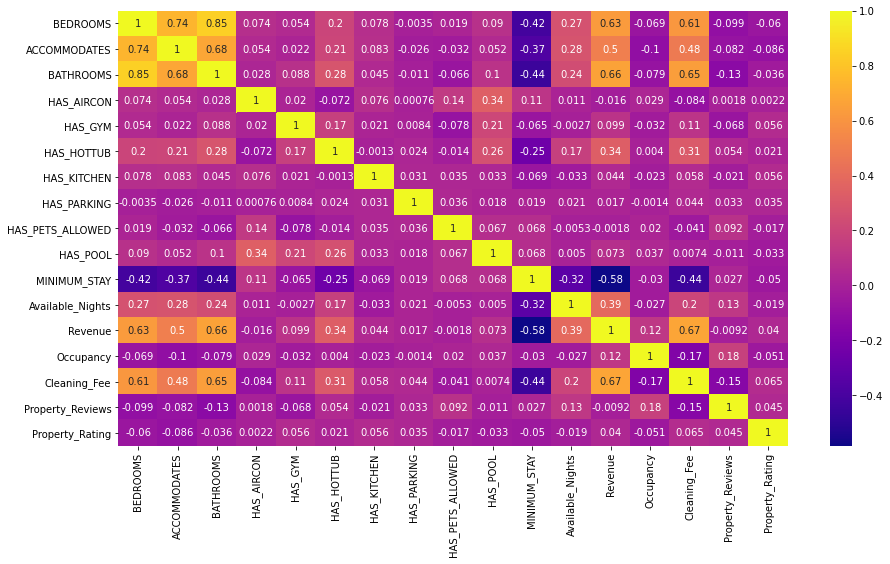

In [18]:
# Correlation analysis

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(filtered_df.select_dtypes('number').corr(),annot=True,cmap='plasma');

#### Investigating Revenue


In [19]:
# Get the list of variables that share high correlation with revenue
high_corr_vars = [col for col in filtered_df.select_dtypes(include=['float64', 'int64']).columns 
                  if col != 'Revenue']

# Define a dropdown widget to select variables
variable_dropdown = widgets.Dropdown(options=high_corr_vars, description='Select Variable:')

# Define a function to update the plot based on the selected variable
def update_plot(selected_variable):
    plt.figure(figsize=(10, 6))
    if filtered_df[selected_variable].dtype == 'float64' or filtered_df[selected_variable].dtype == 'int64':
        sns.scatterplot(x=selected_variable, y='Revenue', data=filtered_df)
        plt.title(f'Scatter plot of {selected_variable} vs Revenue')
    elif filtered_df[selected_variable].dtype == 'object':
        sns.boxplot(x=selected_variable, y='Revenue', data=filtered_df)
        plt.title(f'Box plot of {selected_variable} vs Revenue')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.xlabel(selected_variable)
    plt.ylabel('Revenue')
    plt.show()

# Display the dropdown widget and plot

widgets.interactive(update_plot, selected_variable=variable_dropdown)


interactive(children=(Dropdown(description='Select Variable:', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS…

### Preparing the Dataset

In [20]:
filtered_df.drop(labels=['Airbnb_Host_URL', 'Airbnb_Listing_URL', 'Vrbo_Listing_URL', 'SUPERHOST', 
                        'INSTANT_BOOK', 'Property_ID', 'TITLE', 'Property_Manager/_Host_ID', 'BATHROOMS',
                        'HAS_AIRCON', 'Occupancy', 'Property_Reviews', 'Property_Rating'], axis=1, inplace=True)

X= filtered_df.drop(labels=['Revenue'], axis=1)
y= filtered_df['Revenue']
X

,BEDROOMS,ACCOMMODATES,HAS_GYM,HAS_HOTTUB,HAS_KITCHEN,HAS_PARKING,HAS_PETS_ALLOWED,HAS_POOL,PRICE_TIER,STATE_NAME,MINIMUM_STAY,Available_Nights,Cleaning_Fee
0,5.0,12.0,1,1,1,1,0,1,5. Luxury,California,3.0,320,500.0
1,6.0,16.0,0,0,1,1,1,0,5. Luxury,New York,2.0,332,148.0
2,6.0,12.0,0,1,1,1,1,0,5. Luxury,Colorado,3.0,327,490.0
3,4.0,16.0,0,1,1,1,1,0,2. Economy,Utah,5.0,336,350.0
4,4.0,7.0,0,1,1,1,0,0,3. Midscale,Colorado,5.0,328,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,7.0,16.0,0,1,1,1,0,0,5. Luxury,California,30.0,204,700.0
9016,2.0,6.0,0,0,1,1,1,0,3. Midscale,Vermont,31.0,363,NaN
9021,3.0,6.0,0,0,1,1,1,0,3. Midscale,California,30.0,257,200.0
9026,6.0,12.0,0,0,1,1,1,0,5. Luxury,Massachusetts,7.0,235,300.0


In [21]:
X['PRICE_TIER'].value_counts()

5. Luxury      1336
4. Upscale      715
3. Midscale     469
2. Economy      322
1. Budget       228
Name: PRICE_TIER, dtype: int64

In [22]:
# Manual mapping
price_tier_mapping = {
    '1. Budget': 1,
    '2. Economy': 2,
    '3. Midscale': 3,
    '4. Upscale': 4,
    '5. Luxury': 5,
}

# Assuming 'df' is your DataFrame and 'PRICE_TIER' is the column
X['PRICE_TIER'] = X['PRICE_TIER'].map(price_tier_mapping)
X['PRICE_TIER'].value_counts()

5    1336
4     715
3     469
2     322
1     228
Name: PRICE_TIER, dtype: int64

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 0 to 9035
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BEDROOMS          3070 non-null   float64
 1   ACCOMMODATES      3070 non-null   float64
 2   HAS_GYM           3070 non-null   int64  
 3   HAS_HOTTUB        3070 non-null   int64  
 4   HAS_KITCHEN       3070 non-null   int64  
 5   HAS_PARKING       3070 non-null   int64  
 6   HAS_PETS_ALLOWED  3070 non-null   int64  
 7   HAS_POOL          3070 non-null   int64  
 8   PRICE_TIER        3070 non-null   int64  
 9   STATE_NAME        3070 non-null   object 
 10  MINIMUM_STAY      3070 non-null   float64
 11  Available_Nights  3070 non-null   int64  
 12  Cleaning_Fee      2902 non-null   float64
dtypes: float64(4), int64(8), object(1)
memory usage: 335.8+ KB


In [24]:
# Get the list of column names excluding 'STATE_NAME'
column_names = list(X.columns)
column_names.remove('STATE_NAME')

# Reorder the column names to move 'STATE_NAME' to the last position
column_names.append('STATE_NAME')

# Reindex the DataFrame with the new column order
X = X.reindex(columns=column_names)


### Train/Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Constructing the Pipeline

In [26]:
state_list = X['STATE_NAME'].unique().tolist()

numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first', handle_unknown = 'ignore', categories=[state_list]))])



In [27]:
num_cols = X_train.select_dtypes(['int64', 'float64']).columns

ct = ColumnTransformer(
    [("numpipe", numeric_pipeline, num_cols), 
     ("nominalpipe", nominal_pipeline, ['STATE_NAME'])])

num_cols

Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')

In [28]:
ct

ColumnTransformer(transformers=[('numpipe',
                                 Pipeline(steps=[('numimputer',
                                                  SimpleImputer()),
                                                 ('numnorm',
                                                  StandardScaler())]),
                                 Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                ('nominalpipe',
                                 Pipeline(steps=[('on...
                                                                             'Vermont',
                                                                             'Tennessee',
                                                                             'Florida',
                                                                             'Montana',
                                                                             'North '
                                                                             'Carolina',
                                                                             'Oklahoma',
                                                                             'Texas',
                                                                             'Nevada',
                                                                             'Massachusetts',
                                                                             'Idaho',
                                                                             'Washington',
                                                                             'Georgia',
                                                                             'Missouri',
                                                                             'Maryland',
                                                                             'New '
                                                                             'Hampshire',
                                                                             'Arizona',
                                                                             'Maine',
                                                                             'Oregon',
                                                                             'New '
                                                                             'Mexico',
                                                                             'South '
                                                                             'Carolina',
                                                                             'Arkansas',
                                                                             'South '
                                                                             'Dakota',
                                                                             'West '
                                                                             'Virginia']],
                                                                drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['STATE_NAME'])])

In [29]:
X_train.columns

Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee', 'STATE_NAME'],
      dtype='object')

In [30]:
# Global DataFrame to store evaluation results
all_metrics_df = pd.DataFrame(columns=['Model', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE', 'Train R^2', 'Test R^2'])

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    global all_metrics_df
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4)
    test_rmse = round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4)
    train_mae = round(mean_absolute_error(y_train, y_train_pred), 4)
    test_mae = round(mean_absolute_error(y_test, y_test_pred), 4)
    train_r2 = round(model.score(X_train, y_train), 4)
    test_r2 = round(model.score(X_test, y_test), 4)
    
    # Store metrics in the global DataFrame
    model_metrics = pd.DataFrame({
        'Model': [model_name],
        'Train RMSE': [train_rmse],
        'Test RMSE': [test_rmse],
        'Train MAE': [train_mae],
        'Test MAE': [test_mae],
        'Train R^2': [train_r2],
        'Test R^2': [test_r2]
    })
    all_metrics_df = pd.concat([all_metrics_df, model_metrics], ignore_index=True)
    
    # Visualizations
    plot_evaluation_results(y_test, y_test_pred, model_name)
    
    # Return metrics for the current model
    return model_metrics

def plot_evaluation_results(y_test, y_test_pred, model_name):
    # Visualizations
    plt.figure(figsize=(12, 4))
    
    # Actual vs. predicted values
    plt.subplot(1, 3, 1)
    plt.scatter(y_test_pred, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
    plt.xlabel('Predicted Revenue')
    plt.ylabel('Actual Revenue')
    plt.title('Predicted vs. Actual Revenue (' + model_name + ')')
    
    # Residual plot
    plt.subplot(1, 3, 2)
    residuals = y_test - y_test_pred
    sns.residplot(y_test_pred, residuals, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Predicted Revenue')
    plt.ylabel('Residuals')
    plt.title('Residual Plot (' + model_name + ')')
    
    # Distribution plot of residuals
    plt.subplot(1, 3, 3)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals (' + model_name + ')')
    
    plt.tight_layout()
    plt.show()


## Modeling

### First Model Linear Regression

In [31]:
final_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       LinearRegression())])
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', LinearRegression())])

In [32]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.6873
Baseline Test Rsquared: 0.6933


In [33]:
linear_regression_model = final_pipe.named_steps['model']
coefficients = linear_regression_model.coef_
coefficients

array([ 4.63587605e+04, -2.71787899e+03,  3.99217121e+03,  6.62717084e+03,
       -3.47286723e+03,  3.36653546e+02, -1.61519137e+02,  3.68416910e+03,
        3.27572327e+04, -3.20747471e+04,  2.25909878e+04,  3.75253604e+04,
       -3.50942265e+04, -5.09407361e+03, -1.69350812e+04,  1.15318963e+04,
       -5.61510427e+04, -1.42780054e+04, -4.85671596e+04, -1.19527205e+05,
       -4.36751036e+04, -5.61356766e+04, -6.12800701e+04,  1.96211660e+04,
       -1.61403734e+04, -1.97941870e+04, -6.05386862e+04,  3.51386697e+04,
       -6.11341504e+04, -1.26024517e+05, -2.08195732e+04, -5.84135527e+04,
       -6.78319174e+03, -3.08400172e+04, -3.75124720e+04,  6.08143210e+04,
       -6.17536971e+04, -3.16354802e+04, -2.12584862e+05, -4.01276351e+04])

In [34]:
# Example setup - you'll need to adjust this based on your actual data
num_features = num_cols  # Assuming these are your numeric features
cat_features_info = {
    'STATE_NAME': state_list
}

transformed_feature_names = []  # Initialize an empty list for all feature names post-transformation

# Add numeric feature names directly, as they are unchanged
transformed_feature_names.extend(num_features)

# Manually construct feature names for the one-hot encoded categorical features, excluding the first category
for feature, categories in cat_features_info.items():
    # Iterate over categories starting from the second one (index 1) if the first category is dropped
    for category in categories[1:]:
        transformed_feature_names.append(f"{feature}_{category}")

In [35]:
# Ensure 'transformed_feature_names' and 'coefficients' are correctly defined as above
for predictor, coef in zip(transformed_feature_names, coefficients):
    print(f'Predictor: {predictor}, Coefficient: {coef}')

Predictor: BEDROOMS, Coefficient: 46358.76048062565
Predictor: ACCOMMODATES, Coefficient: -2717.878985982592
Predictor: HAS_GYM, Coefficient: 3992.1712084410497
Predictor: HAS_HOTTUB, Coefficient: 6627.170835234057
Predictor: HAS_KITCHEN, Coefficient: -3472.867225236191
Predictor: HAS_PARKING, Coefficient: 336.6535456488644
Predictor: HAS_PETS_ALLOWED, Coefficient: -161.5191374470615
Predictor: HAS_POOL, Coefficient: 3684.169102208094
Predictor: PRICE_TIER, Coefficient: 32757.232739914067
Predictor: MINIMUM_STAY, Coefficient: -32074.747147785274
Predictor: Available_Nights, Coefficient: 22590.987778449657
Predictor: Cleaning_Fee, Coefficient: 37525.36042222274
Predictor: STATE_NAME_New York, Coefficient: -35094.22646585915
Predictor: STATE_NAME_Colorado, Coefficient: -5094.073609199268
Predictor: STATE_NAME_Utah, Coefficient: -16935.081247921615
Predictor: STATE_NAME_Wyoming, Coefficient: 11531.896291775063
Predictor: STATE_NAME_Pennsylvania, Coefficient: -56151.042747938955
Predictor:

In [36]:
final_pipe_grid = {'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
             'model__fit_intercept': [True, False]}
gs_lr_full_pipe = GridSearchCV(estimator = final_pipe, param_grid = final_pipe_grid, cv=5)
gs_lr_full_pipe.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_lr_full_pipe.best_score_, 4)}')
print(f'Best Parameters: {gs_lr_full_pipe.best_params_}')

best_lr_model = gs_lr_full_pipe.best_estimator_

Best GS Score: 0.674
Best Parameters: {'model__fit_intercept': True, 'preprocess__numpipe__numimputer__strategy': 'mean'}


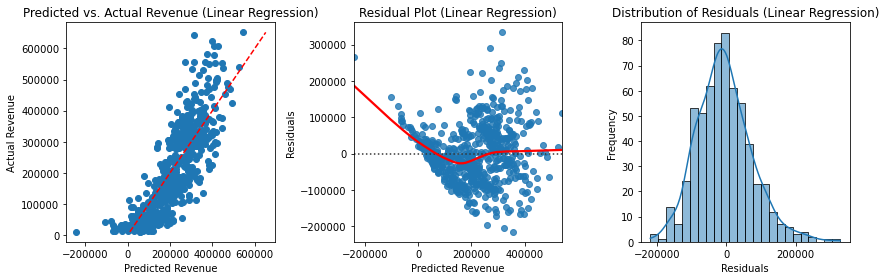

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Linear Regression,83545.6686,79516.2759,61888.486,61672.2107,0.6873,0.6933


In [37]:
evaluate_model(best_lr_model, X_train, y_train, X_test, y_test, 'Linear Regression')

### Next Model (Ridge Regression)

In [38]:
final_pipe.steps[-1] = ('model', Ridge(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', Ridge(random_state=42))])

In [39]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.687
Baseline Test Rsquared: 0.6933


In [40]:
final_pipe_grid_r = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__alpha': [0.1, 0.2, 0.4, 0.5, 0.8, 1.0, 1.6, 2.0, 3.2, 4.0, 6.0, 8.0, 10.0],  # Regularization strength
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Solver for optimization
    'model__random_state': [42]  # Random state for reproducibility
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_r = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_r, cv=5)
gs_full_pipe_r.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_r.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_r.best_params_}')

best_r_model = gs_full_pipe_r.best_estimator_

Best GS Score: 0.6748
Best Parameters: {'model__alpha': 3.2, 'model__random_state': 42, 'model__solver': 'auto', 'preprocess__numpipe__numimputer__strategy': 'mean'}


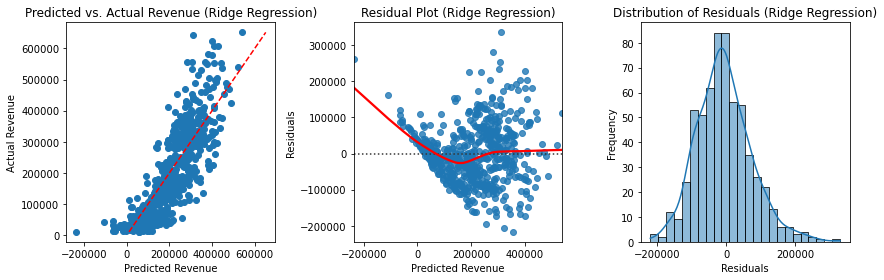

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Ridge Regression,83686.9855,79608.6407,62062.8609,61602.7549,0.6863,0.6926


In [41]:
evaluate_model(best_r_model, X_train, y_train, X_test, y_test, 'Ridge Regression')

# Next Model (Lasso)

In [42]:
final_pipe.steps[-1] = ('model', Lasso(random_state=42, max_iter=1000))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', Lasso(random_state=42))])

In [43]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.6873
Baseline Test Rsquared: 0.6933


In [44]:
final_pipe_grid_l = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__alpha': [0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5, 2.0],  # Regularization strength
    'model__max_iter': [500, 1000, 1500, 2000, 2500],  # Maximum number of iterations
    'model__random_state': [42]  # Random state for reproducibility
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_l = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_l, cv=5)
gs_full_pipe_l.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_l.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_l.best_params_}')

best_l_model = gs_full_pipe_l.best_estimator_

Best GS Score: 0.674
Best Parameters: {'model__alpha': 2.0, 'model__max_iter': 500, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'mean'}


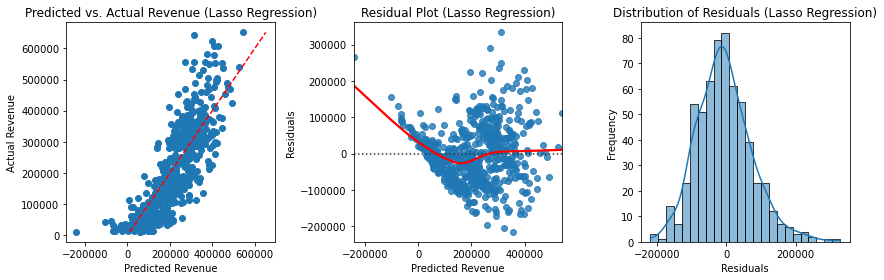

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Lasso Regression,83545.8858,79513.7219,61891.9664,61667.7066,0.6873,0.6934


In [45]:
evaluate_model(best_l_model, X_train, y_train, X_test, y_test, 'Lasso Regression')

# Next Model KNN Regressor

In [46]:
final_pipe.steps[-1] = ('model', KNeighborsRegressor())
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', KNeighborsRegressor())])

In [47]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.7603
Baseline Test Rsquared: 0.6418


In [48]:
final_pipe_grid_knn = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__n_neighbors': [10, 12, 14, 16, 18, 20],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__leaf_size': [10, 15, 20, 25, 30, 35],
    'model__p': [1, 2]
}

gs_full_pipe_knn = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_knn, cv=5)
gs_full_pipe_knn.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_knn.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_knn.best_params_}')

best_knn_model = gs_full_pipe_knn.best_estimator_

Best GS Score: 0.6983
Best Parameters: {'model__algorithm': 'ball_tree', 'model__leaf_size': 35, 'model__n_neighbors': 16, 'model__p': 1, 'model__weights': 'distance', 'preprocess__numpipe__numimputer__strategy': 'median'}


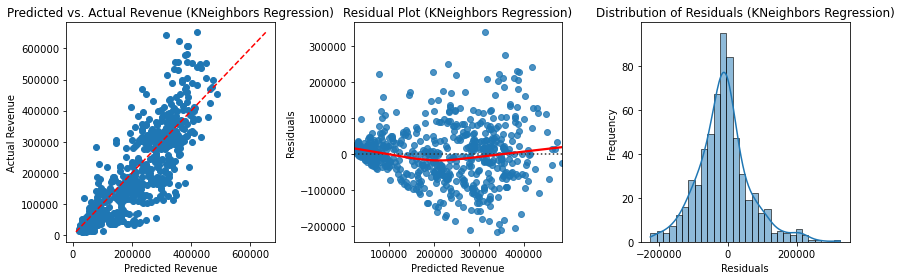

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,KNeighbors Regression,474.8732,78556.6315,21.9353,57644.6915,1.0,0.7007


In [49]:
evaluate_model(best_knn_model, X_train, y_train, X_test, y_test, 'KNeighbors Regression')

# Next Model (Decision Tree Regressor)

In [50]:
final_pipe.steps[-1] = ('model', DecisionTreeRegressor(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [51]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 1.0
Baseline Test Rsquared: 0.6034


In [52]:
final_pipe_grid_dt = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'model__splitter': ['best', 'random'],
    'model__max_depth': [None, 2, 4, 6, 8, 10],
    'model__min_samples_split': [2, 4, 6, 8, 10],
    'model__min_samples_leaf': [2, 4, 6, 8, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__random_state': [42]
}

gs_full_pipe_dt = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_dt, cv=5)
gs_full_pipe_dt.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_dt.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_dt.best_params_}')

best_dt_model = gs_full_pipe_dt.best_estimator_

Best GS Score: 0.741
Best Parameters: {'model__criterion': 'squared_error', 'model__max_depth': 6, 'model__max_features': 'auto', 'model__min_samples_leaf': 10, 'model__min_samples_split': 2, 'model__random_state': 42, 'model__splitter': 'best', 'preprocess__numpipe__numimputer__strategy': 'mean'}


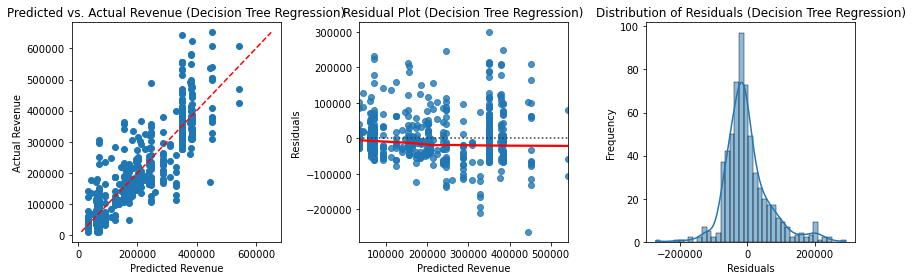

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Decision Tree Regression,67132.2759,66327.0158,46220.7472,47110.5129,0.7981,0.7866


In [53]:
evaluate_model(best_dt_model, X_train, y_train, X_test, y_test, 'Decision Tree Regression')

# Next Model (Adaboost regressor)

In [54]:
final_pipe.steps[-1] = ('model', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                                   random_state=42))])

In [55]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.999
Baseline Test Rsquared: 0.7974


In [ ]:
final_pipe_grid_adaboost = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__base_estimator__max_depth': [None, 10, 15, 20],  # Parameters for the base estimator (e.g., DecisionTreeRegressor)
    'model__n_estimators': [200, 220, 240],  # Number of estimators (weak learners)
    'model__learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'model__loss': ['linear', 'square', 'exponential'],  # Loss function
    'model__random_state': [42]
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_adaboost = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_adaboost, cv=5)
gs_full_pipe_adaboost.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_adaboost.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_adaboost.best_params_}')

best_ab_model = gs_full_pipe_adaboost.best_estimator_

In [ ]:
evaluate_model(best_ab_model, X_train, y_train, X_test, y_test, 'Adaboost Regression')

# Next Model (XGBoost)

In [ ]:
final_pipe.steps[-1] = ('model', XGBRegressor(random_state = 42))
final_pipe

In [ ]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

In [ ]:
final_pipe_grid_xgboost = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__max_depth': [3, 4, 5, 6, 7],
    'model__learning_rate': [0.01, 0.1, 1.0],
    'model__n_estimators': [150, 155, 160, 165],
    'model__gamma': [0, 0.1, 0.2],
    'model__random_state': [42]
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_xgboost = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_xgboost, cv=5)
gs_full_pipe_xgboost.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_xgboost.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_xgboost.best_params_}')

best_xg_model = gs_full_pipe_xgboost.best_estimator_

In [ ]:
evaluate_model(best_xg_model, X_train, y_train, X_test, y_test, 'XGboost Regression')

# Next Model (GradientBoosting Regressor)

In [ ]:
final_pipe.steps[-1] = ('model', GradientBoostingRegressor(random_state = 42))
final_pipe

In [ ]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

In [ ]:
final_pipe_grid_gbr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__n_estimators': [150, 200, 250],  # Number of boosting stages to be run
    'model__learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'model__min_samples_split': [4, 5, 6, 7],
    'model__min_samples_leaf': [3, 4, 5],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_gbr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_gbr, cv=5)
gs_full_pipe_gbr.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_gbr.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_gbr.best_params_}')

best_gbr_model = gs_full_pipe_gbr.best_estimator_

In [ ]:
evaluate_model(best_gbr_model, X_train, y_train, X_test, y_test, 'Gradient Boosting Regression')

# Next Model (Elastic Net Regression)

In [ ]:
final_pipe.steps[-1] = ('model', ElasticNet(random_state=42))
final_pipe

In [ ]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

In [ ]:
final_pipe_grid_enr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Regularization parameter
    'model__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # Mixing parameter
    'model__fit_intercept': [True, False],  # Whether to fit an intercept
    'model__random_state': [42]
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_enr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_enr, cv=5)
gs_full_pipe_enr.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_enr.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_enr.best_params_}')

best_enr_model = gs_full_pipe_enr.best_estimator_

In [ ]:
evaluate_model(best_enr_model, X_train, y_train, X_test, y_test, 'Elastic Net Regression')

# Next Model (Support Vector Regression)

In [ ]:
final_pipe.steps[-1] = ('model', SVR())
final_pipe

In [ ]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

In [ ]:
final_pipe_grid_svr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Assuming 'numimputer' is the name of your imputer step
    'model__kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel function: linear or radial basis function (RBF)
    'model__C': [0.1, 0.5, 1, 3, 4, 5, 6, 7, 8, 9, 10],  # Regularization parameter
    'model__gamma': ['scale', 'auto']  # Kernel coefficient for RBF kernel
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_svr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_svr, cv=5)
gs_full_pipe_svr.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_svr.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_svr.best_params_}')

best_svr_model = gs_full_pipe_svr.best_estimator_

In [ ]:
evaluate_model(best_svr_model, X_train, y_train, X_test, y_test, 'Support Vector Regression')

# StackingRegressor

In [ ]:
estimators = [
    ('ab', best_ab_model),
    ('xg', best_xg_model),
    ('gbr', best_gbr_model)
]

sr = StackingRegressor(estimators, final_estimator=LinearRegression())

In [ ]:
sr.fit(X_train, y_train)

In [ ]:
print(f'Train Rsquared: {round(sr.score(X_train, y_train),4)}')
print(f'Test Rsquared: {round(sr.score(X_test, y_test),4)}')

In [ ]:
evaluate_model(sr, X_train, y_train, X_test, y_test, 'Stacking Regressor')

# Voting Regressor

In [ ]:
voting_regressor = VotingRegressor(estimators)

In [ ]:
voting_regressor.fit(X_train, y_train)

In [ ]:
print(f'Train Rsquared: {round(voting_regressor.score(X_train, y_train),4)}')
print(f'Test Rsquared: {round(voting_regressor.score(X_test, y_test),4)}')

In [ ]:
evaluate_model(voting_regressor, X_train, y_train, X_test, y_test, 'Voting Regressor')

# Summary

In [ ]:
all_metrics_df.sort_values(by='Test R^2', ascending=False)